In [ ]:
# Data analysis Project on Netflix Data : By Anduamlak_Y
# Task 1: What is the most popoular release year for movies on netflix.
# Task 2 : What year did netflix add the most content to its platform?
# Task 3: What is the movie with the longest title in the dataset?
# Task 4: which actr/actress shown up most frequently in netflix database?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style('darkgrid')
import sqldf
import plotly
import plotly.express as px
from pandas_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class

In [ ]:
# Data preprocessing 

In [3]:
#Visualizing the relationship of the data
AV = AutoViz_Class()
AV.AutoViz('netflix_titles.csv/netflix_titles.csv')

Shape of your Data Set loaded: (8807, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
show_id,8807,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
title,8807,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
description,8775,object,0,0.000000,99.636653,1,combine rare categories
cast,7692,object,825,9.367549,87.339616,1,"combine rare categories, fill missing, fix mixed data types"
director,4528,object,2634,29.908028,51.413648,1,"combine rare categories, fill missing, fix mixed data types"
date_added,1767,object,10,0.113546,20.063586,1,"combine rare categories, fill missing, fix mixed data types"
country,748,object,831,9.435676,8.493244,1,"combine rare categories, fill missing, fix mixed data types"
listed_in,514,object,0,0.000000,5.836267,1,combine rare categories
duration,220,object,3,0.034064,2.498013,1,"combine rare categories, fill missing, fix mixed data types"
release_year,74,int64,0,0.000000,0.840241,0,


    12 Predictors classified...
Cannot visualize this dataset since no numeric or integer vars in data...returning
Not able to read or load file. Please check your inputs and try again...


In [7]:
#Total number of null values
null_values=df[df.isnull().any(axis=1)]
null_values.shape

(3475, 12)

In [8]:
#Droping the null values and got the new shape of the data frame
df=df.dropna()
df.shape

(5332, 12)

In [9]:
#Checking the no of duplicate records with respect to all columns.
df[df.duplicated(subset=None)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


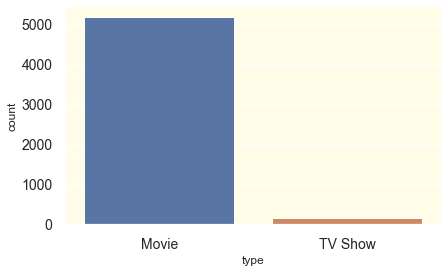

In [26]:
# count plot on content type
sn.countplot(x=df['type'],data=df)
# Show the plot
plt.show()
# To count the number in each content type

# Task 1: What is the most popoular release year for movies on netflix.

In [10]:
popular_release_year=df[df['type']=='Movie']
popular_release_year=popular_release_year.groupby('release_year')['show_id'].count().reset_index().sort_values('show_id',ascending=False)
popular_release_year.columns=['release_year','Total_no_released_movies']
popular_release_year
#Answer : 2017 and 2018 is the most popular release year for movies in Netflix

,release_year,Total_no_released_movies
67,2017,640
68,2018,632
66,2016,567
69,2019,495
70,2020,409
...,...,...
9,1959,1
11,1961,1
13,1963,1
16,1966,1


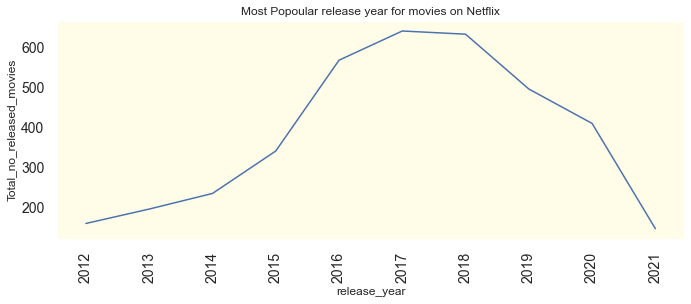

In [15]:
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.grid(b=None)
release_year=popular_release_year.head(10)
sn.lineplot(x=release_year['release_year'],y=release_year['Total_no_released_movies'])
sn.set(rc={"axes.facecolor":"#FFFDE7", "axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})
plt.xticks(release_year['release_year'],rotation='vertical')
plt.title('Most Popoular release year for movies on Netflix')
plt.show()

# Task 2 : What year did netflix add the most content to its platform?

In [18]:
df['date_added']=pd.to_datetime(df['date_added'])
df['year_added']=df['date_added'].dt.year

In [19]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV","A talented batch of amateur bakers face off in a 10-week competition, whipping up their best dishes in the hopes of being named the U.K.'s best.",2021


In [20]:
most_content_added_year=df.groupby('year_added')['show_id'].count().reset_index().sort_values('show_id',ascending=False)
most_content_added_year.columns=['year_added','Total_no_added_contents']
most_content_added_year
# Answer : 2019 is the year that netflix add the most content to its platform

,year_added,Total_no_added_contents
11,2019,1265
12,2020,1194
10,2018,1101
13,2021,755
9,2017,724
8,2016,202
7,2015,50
6,2014,14
3,2011,13
5,2013,7


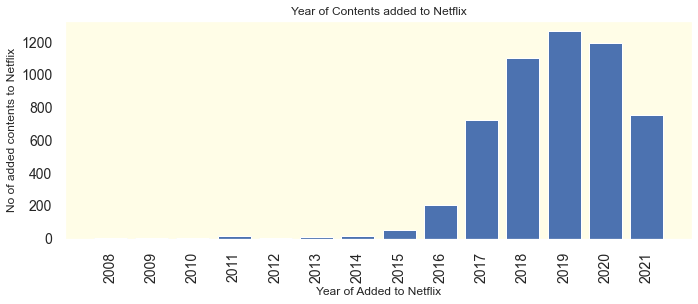

In [21]:
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.grid(b=None)
plt.bar(most_content_added_year['year_added'],most_content_added_year['Total_no_added_contents'])
plt.xlabel("Year of Added to Netflix")
plt.ylabel("No of added contents to Netflix")
plt.xticks(most_content_added_year['year_added'],rotation='vertical')
plt.title('Year of Contents added to Netflix')
plt.show()

# Task 3: What is the movie with the longest title in the dataset?

In [61]:
movie_title=df[df['type']=='Movie']
movie_title.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.,2021


In [81]:
#counting the length of the movie titles
movie_title['title_length']=movie_title['title'].str.len()
movie_title.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,title_length
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24 00:00:00,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",2021,7
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor",United States,2021-09-24 00:00:00,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.,2021,12
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouché, Elizaveta Maximová","Germany, Czech Republic",2021-09-23 00:00:00,2021,TV-MA,127 min,"Dramas, International Movies","After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.",2021,12


In [86]:
# Applying SQL query to find the maximum movie title 
Query1='''
          select title,max(title_length) as title_length from movie_title
          group by title order by max(title_length) desc
'''
longest_movie_title=sqldf.run(Query1).head()
longest_movie_title

,title,title_length
0,"Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton",104
1,Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life,83
2,Willy and the Guardians of the Lake: Tales from the Lakeside Winter Adventure,77
3,Green White Green (And All the Beautiful Colours in My Mosaic of Madness),73
4,Judah Friedlander: America Is the Greatest Country in the United States,71


In [85]:
longest_movie_title=sqldf.run(Query1).head(1)
longest_movie_title
#Answer 3: Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton is 

,title,title_length
0,"Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton",104


# Task 4: which actr/actress shown up most frequently in netflix database?

In [87]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV","A talented batch of amateur bakers face off in a 10-week competition, whipping up their best dishes in the hopes of being named the U.K.'s best.",2021


In [98]:
# Adding new columns to split cast column
df['casts']=df['cast'].apply(lambda x:x.split(','))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,casts
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",2021,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri]"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV","A talented batch of amateur bakers face off in a 10-week competition, whipping up their best dishes in the hopes of being named the U.K.'s best.",2021,"[Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood]"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.,2021,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor]"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouché, Elizaveta Maximová","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies","After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.",2021,"[Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouché, Elizaveta Maximová]"
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi, Nassar",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies","When the father of the man she loves insists that his twin sons marry twin sisters, a woman creates an alter ego that might be a bit too convincing.",2021,"[Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi, Nassar]"


In [116]:
# Use list comprehension using two for loops, and changing all cast names to lower 
# case and avoid white spaces at begining and ending.
cast_counter = pd.Series([x.strip().lower() for cast in df.casts for x in cast]).value_counts()
cast_counter=pd.DataFrame(cast_counter)
cast_counter.columns=['Frequency']
cast_counter.head()
# Answer: Anupam Kher, shah rukh khan,naseeruddin shah are shown up most frequently in netflix database

,Frequency
anupam kher,42
shah rukh khan,34
naseeruddin shah,31
om puri,30
akshay kumar,30
